In [12]:
from IPython.display import display, Audio
import numpy as np
from scipy.io import wavfile
import sounddevice as sd
import time

In [13]:
file_name = "17_Climb_1" 
file_path = "Test Samples/clean_samples/17_Climb_samples/" + file_name + ".wav"  
sample_rate, audio_signal = wavfile.read(file_path)

# Print the sample rate
print("Sample Rate:")   
print(sample_rate)

channels = audio_signal.shape[1]
print(f"number of channels = {channels}")
length = audio_signal.shape[0] / sample_rate
print(f"length = {length}s")

# Print the audio signal
print("Raw audio signal:")
print(audio_signal[:, 0])

print("length of a channel of audio signal in samples:")
samples_length = len(audio_signal[:, 0])
print(samples_length)

# Save the array to a text file
# log_file_path = "logs/" + file_name + ".txt"
# np.savetxt(log_file_path, audio_signal)

# Play the audio
#Audio(file_path)




Sample Rate:
44100
number of channels = 2
length = 14.0s
Raw audio signal:
[-8012 -8017 -8474 ... 10072 10930 11418]
length of a channel of audio signal in samples:
617400


In [14]:
import matplotlib.pyplot as plt
import numpy as np
# time = np.linspace(0., length, audio_signal.shape[0])
# plt.plot(time, audio_signal[:, 0], label="Left channel")
# plt.plot(time, audio_signal[:, 1], label="Right channel")
# plt.legend()
# plt.xlabel("Time [s]")
# plt.ylabel("Amplitude")
# plt.show()

In [15]:
from scipy.fft import fft, dct
from scipy.signal import hann
import scipy.signal

window_size = 100
samplesperseg = 1024
print(samplesperseg)
# The number of samples to overlap between adjacent segments
samplesoverlap = samplesperseg // 8
#sample 17
# Parameters for the spectrogram
f, t, Sxx = scipy.signal.spectrogram(audio_signal[:, 0], 
                                     fs = sample_rate, 
                                     window='hann',         # The window function to be applied to each segment of the signal.
                                     nperseg=samplesperseg,
                                     noverlap=samplesoverlap,
                                     nfft=samplesperseg
                                     )

1024


In [16]:
print(t.shape)
print(f.shape)
print(Sxx.shape)

print(t)
print(f)
# Sxxlog_file_path = "logs/" + "Sxx" + ".txt"
# np.savetxt(Sxxlog_file_path, Sxx)

(688,)
(513,)
(513, 688)
[1.16099773e-02 3.19274376e-02 5.22448980e-02 7.25623583e-02
 9.28798186e-02 1.13197279e-01 1.33514739e-01 1.53832200e-01
 1.74149660e-01 1.94467120e-01 2.14784580e-01 2.35102041e-01
 2.55419501e-01 2.75736961e-01 2.96054422e-01 3.16371882e-01
 3.36689342e-01 3.57006803e-01 3.77324263e-01 3.97641723e-01
 4.17959184e-01 4.38276644e-01 4.58594104e-01 4.78911565e-01
 4.99229025e-01 5.19546485e-01 5.39863946e-01 5.60181406e-01
 5.80498866e-01 6.00816327e-01 6.21133787e-01 6.41451247e-01
 6.61768707e-01 6.82086168e-01 7.02403628e-01 7.22721088e-01
 7.43038549e-01 7.63356009e-01 7.83673469e-01 8.03990930e-01
 8.24308390e-01 8.44625850e-01 8.64943311e-01 8.85260771e-01
 9.05578231e-01 9.25895692e-01 9.46213152e-01 9.66530612e-01
 9.86848073e-01 1.00716553e+00 1.02748299e+00 1.04780045e+00
 1.06811791e+00 1.08843537e+00 1.10875283e+00 1.12907029e+00
 1.14938776e+00 1.16970522e+00 1.19002268e+00 1.21034014e+00
 1.23065760e+00 1.25097506e+00 1.27129252e+00 1.29160998e+00

In [17]:
# Plot spectrogram
# plt.pcolormesh(t, f, 10 * np.log10(Sxx))  # Use log scale for better visualization
# plt.ylabel('Frequency [Hz]')
# plt.xlabel('Time [sec]')
# plt.colorbar(label='Power/Frequency (dB/Hz)')
# plt.show()

In [18]:
from scipy.ndimage import maximum_filter

# Define the neighborhood size:
window_size = 50
neighborhood_size = (window_size, window_size)

# Apply the maximum filter to identify local maxima in the spectrogram.
local_maxima = maximum_filter(Sxx, size=neighborhood_size) == Sxx
print(local_maxima)

# Extract the coordinates of the local maxima
maxima_coordinates = np.where(local_maxima == True)
print((maxima_coordinates))



[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]
(array([  4,   4,   4,   4,   4,   4,   4,   5,   5,   5,   5,   5,  59,
        92,  95,  96,  97, 105, 107, 107, 111, 112, 117, 131, 136, 142,
       143, 145, 147, 157, 158, 177, 177, 179, 187, 198, 199, 203, 205,
       205, 212, 213, 218, 223, 228, 235, 238, 247, 262, 263, 264, 265,
       269, 276, 278, 281, 283, 307, 309, 313, 315, 316, 324, 325, 329,
       361, 363, 369, 416, 419, 423, 423, 425, 426, 438, 439, 440, 444,
       489, 490, 494, 494, 495, 504, 506], dtype=int64), array([  0,  41, 120, 227, 347, 375, 678,  91, 450, 498, 576, 652, 292,
        65, 207, 343, 669, 306,  16, 609, 373, 441, 261,  80, 302, 261,
       674,  17, 215, 609, 440, 302, 341, 372, 687, 442,  56, 609, 372,
       574, 645,  17, 212, 261

In [19]:
t_constellationvalues = t[np.array(maxima_coordinates[1])]
f_constellationvalues = f[np.array(maxima_coordinates[0])]

# Plot the constellation map
# plt.scatter(t_constellationvalues, f_constellationvalues, color='blue', marker='x')
# plt.xlabel('Time')
# plt.ylabel('Frequency')
# plt.title('Constellation Map')
# plt.show()

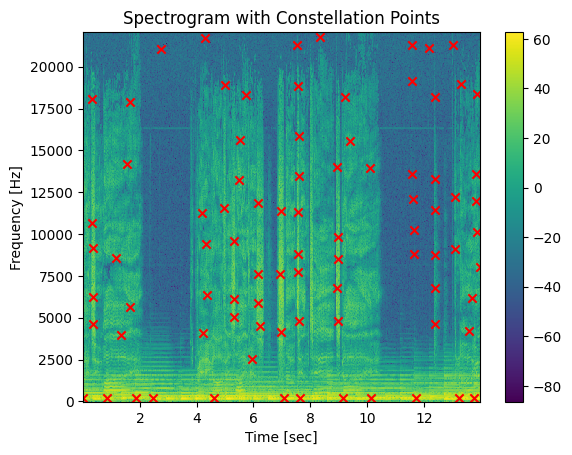

In [20]:
# Create the figure and axes
fig, ax = plt.subplots()
colormesh = ax.pcolormesh(t, f, 10 * np.log10(Sxx))  # Use log scale for better visualization
ax.scatter(t_constellationvalues, f_constellationvalues, color='red', marker='x')

# Set labels and title
ax.set_xlabel('Time [sec]')
ax.set_ylabel('Frequency [Hz]')
ax.set_title('Spectrogram with Constellation Points')
cbar = fig.colorbar(colormesh)
plt.show()

In [21]:
# combinatorial hash generation
import hashlib

# target zone width in seconds
targetzone_width = 10

# target zone height in frequency
targetzone_height = 1000

constellation_points = list(zip(t_constellationvalues, f_constellationvalues))

anchor_points = list(zip(t_constellationvalues, f_constellationvalues))

# Create an empty list
hash_list = []

anchortime_list = []

# loop over every point in constellation as anchor point
for anchor_point in anchor_points:
    print("anchor point : ", anchor_point)
    t_anchor, f_anchor = anchor_point  # Unpack the point into individual variables
    # targetzone_left = t_anchor - targetzone_width / 2.0
    # targetzone_right = t_anchor + targetzone_width / 2.0

    targetzone_left = t_anchor + 0.1
    targetzone_right = t_anchor + 0.1 + targetzone_width

    targetzone_lowerlimit = f_anchor - targetzone_height / 2.0
    targetzone_upperlimit = f_anchor + targetzone_height / 2.0

    # loop over every point in the constellation in the target zone of the current anchor point 
    for constellation_point in constellation_points:
        t_constellation, f_constellation = constellation_point  # Unpack the point into individual variables

        # check if constellation point in the target zone of the current anchor point 
        if(targetzone_left <= t_constellation <= targetzone_right) and (targetzone_lowerlimit <= f_constellation <= targetzone_upperlimit) and (anchor_point != constellation_point):
            t1 = t_anchor
            f1 = f_anchor
            t2 = t_constellation
            f2 = f_constellation

            print("\t constellation point : ", constellation_point)
            # delta_t = np.around(t2 , 2) - np.around(t1 , 2)
            # message = str(np.around(f1, 2)) + str(np.around(f2, 2)) + str(delta_t)
            # md5_hash = hashlib.md5(message.encode()).hexdigest()
            # hash_list.append(md5_hash)
            # anchortime_list.append(np.around(t1 , 2))
            delta_t = np.around(t2 - t1, 2)
            message = str(np.around(f1, 2)) + str(np.around(f2, 2)) + str(delta_t)
            md5_hash = hashlib.md5(message.encode()).hexdigest()
            hash_list.append(md5_hash)
            anchortime_list.append(t1)
            print("\t md5 Hash of ",message,  " is: ", md5_hash, "  ,t1: " ,t1)

anchor point :  (0.011609977324263039, 172.265625)
	 constellation point :  (0.844625850340136, 172.265625)
	 md5 Hash of  172.27172.270.83  is:  0eeb66b03f631a4abd1f35062120d90a   ,t1:  0.011609977324263039
	 constellation point :  (2.449705215419501, 172.265625)
	 md5 Hash of  172.27172.272.44  is:  188833e4c1615faf3e2d075fc71d2994   ,t1:  0.011609977324263039
	 constellation point :  (4.6236734693877555, 172.265625)
	 md5 Hash of  172.27172.274.61  is:  3fcbc8c739c703ef080f460b3350b4b9   ,t1:  0.011609977324263039
	 constellation point :  (7.061768707482993, 172.265625)
	 md5 Hash of  172.27172.277.05  is:  b365c8e0a04523bf57c9c017c0461b98   ,t1:  0.011609977324263039
	 constellation point :  (7.630657596371882, 172.265625)
	 md5 Hash of  172.27172.277.62  is:  3284c0d98359342c3d2c2056b6d06b13   ,t1:  0.011609977324263039
	 constellation point :  (1.8604988662131519, 215.33203125)
	 md5 Hash of  172.27215.331.85  is:  5c623d3dab2b3209f2343c7cf650aa80   ,t1:  0.011609977324263039
	 c

In [22]:
import pandas as pd

# Create a dictionary with the lists
data = {'hash': hash_list,
        'anchor time': anchortime_list}

# Create a DataFrame from the dictionary
hashes_df = pd.DataFrame(data)

print(hashes_df.shape)
hashes_df.head()

# Specify the file name
song_hash_filename = "logs/" + file_name + "_sample_hashes" + ".txt"

# Write the DataFrame to a CSV file
hashes_df.to_csv(song_hash_filename, index=False)

(193, 2)
